In [1]:
from fractaldimension import fractal_dimension
import cv2
import os

%matplotlib inline

def fractalDimension(number):
    im = cv2.imread('images/'+str(number)+'.tiff', cv2.IMREAD_GRAYSCALE)
    newDimension = fractal_dimension(im, 0.9)
    return newDimension

def compressionScore(number):
    statinfo = os.stat('images/'+str(number)+'.gif')
    gif = statinfo.st_size
    
    statinfo = os.stat('images/'+str(number)+'.tiff')
    tiff = statinfo.st_size
    
    return tiff/gif

In [54]:
!pip install ipywidgets 
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [57]:
import random
import math
import number2automata

scores = {}

lowerbound = math.pow(10,2)
upperbound = math.pow(10,32)

for _ in tqdm(range(5)):
    number = random.randint(lowerbound,upperbound)
    number2automata.numberToAutomata(number,30)
    fscore = fractalDimension(number)
    cscore = compressionScore(number)
    scores[number] = {"Fractal Dimension":fscore,"Compression Eficciency":cscore}


A Jupyter Widget

KeyboardInterrupt: 

In [3]:
import pandas as pd
df = pd.DataFrame(scores)
df = df.transpose()
df.head()

,Compression Eficciency,Fractal Dimension
50254305823462564360053707997784,1.547942,1.982962
5076236373505516517829567634098,1.423907,1.985866
53967109617608478119513770169513,1.097496,1.993353
24794353412833046358785022549664,1.471589,1.882873
65234455806175323826464418165195,1.241146,1.991735


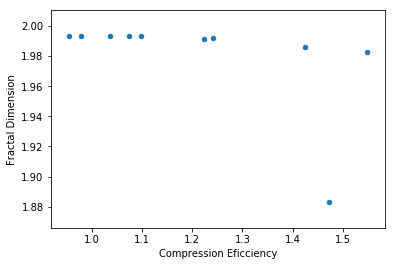

In [4]:
df.plot(kind='scatter', x='Compression Eficciency',y="Fractal Dimension")

In [5]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(df[['Fractal Dimension','Compression Eficciency']].values)
df["cluster"] = clustering.labels_

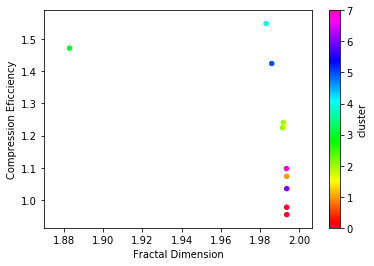

In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('gist_rainbow')
ax = df.plot(kind='scatter', x='Fractal Dimension', y='Compression Eficciency',cmap=cmap, c='cluster',ax=ax)

plt.show()

In [43]:
def showImages(cluster,total=None):
    values = df[df["cluster"]== cluster].index

    import random
    plt.figure(figsize=(12,12))

    if total is None:
        total = len(values)

    sq = int(math.sqrt(total))

    for i,k in enumerate(random.sample(range(len(values)), sq*sq)):
        plt.subplot(sq,sq,i+1)
        img = plt.imread('images/'+str(values[k])+'.tiff')
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()

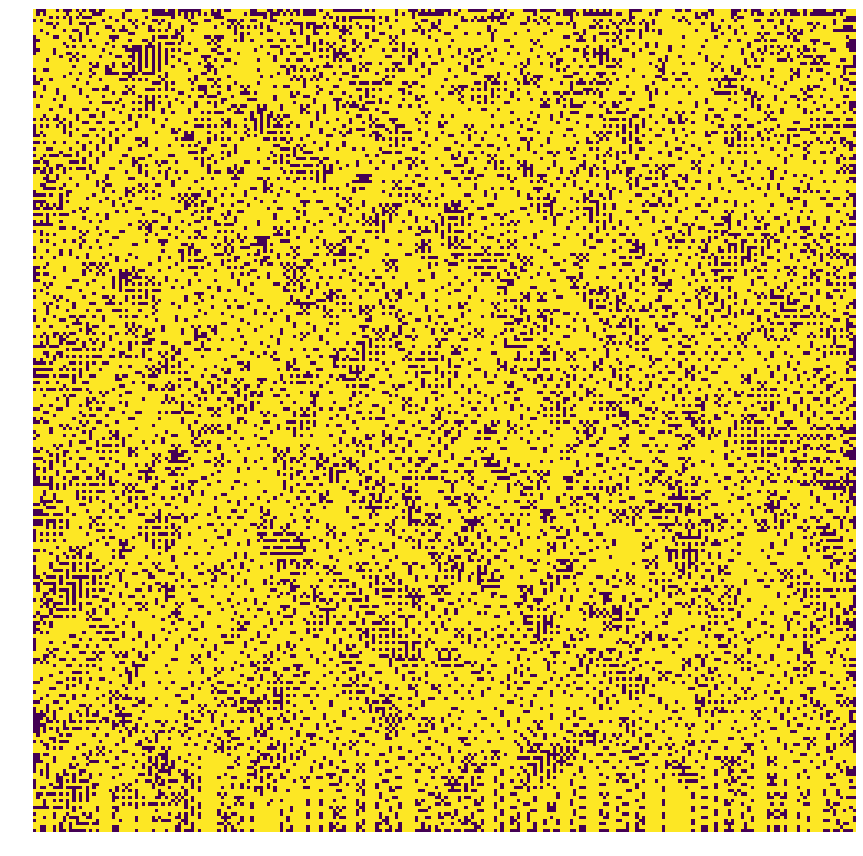

In [50]:
showImages(5)

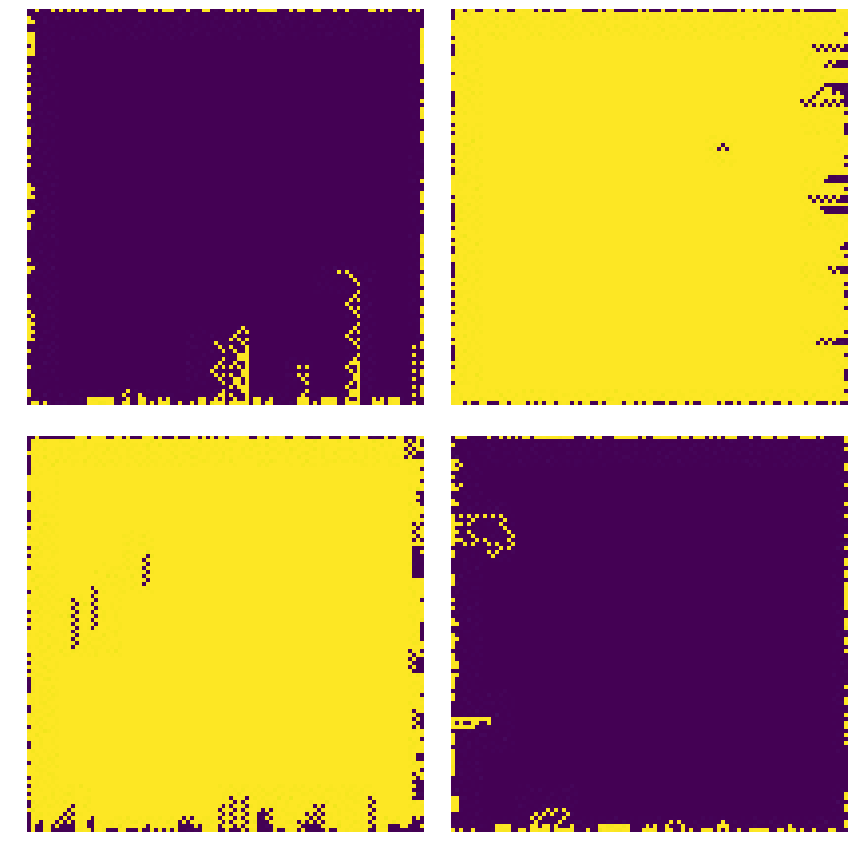

In [155]:
showImages(7,4)

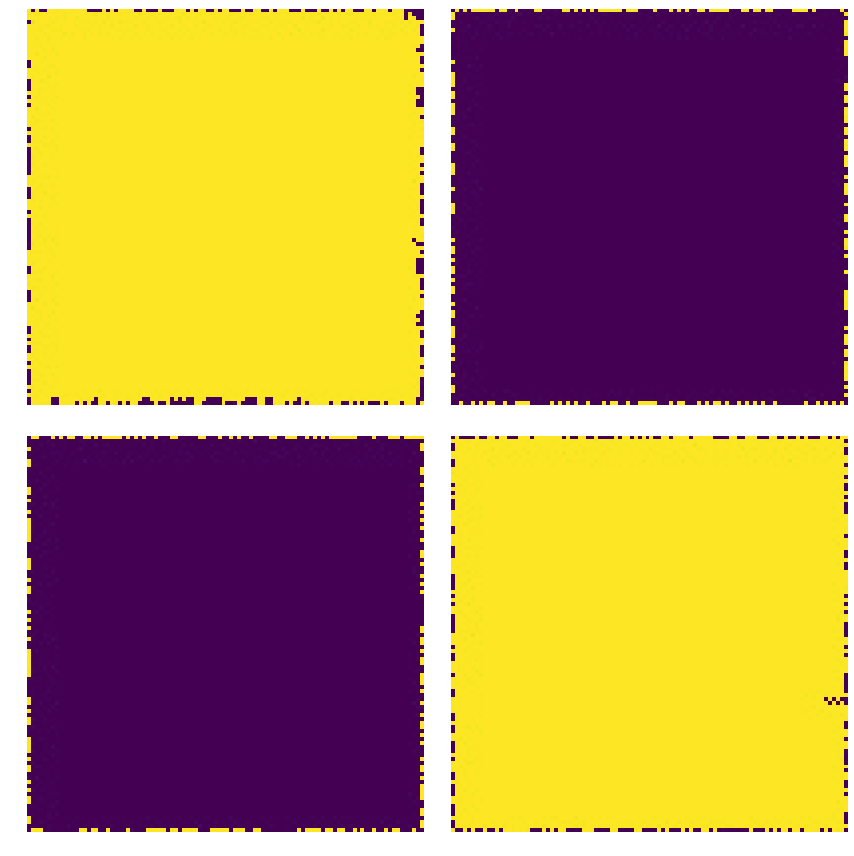

In [156]:
showImages(3,4)

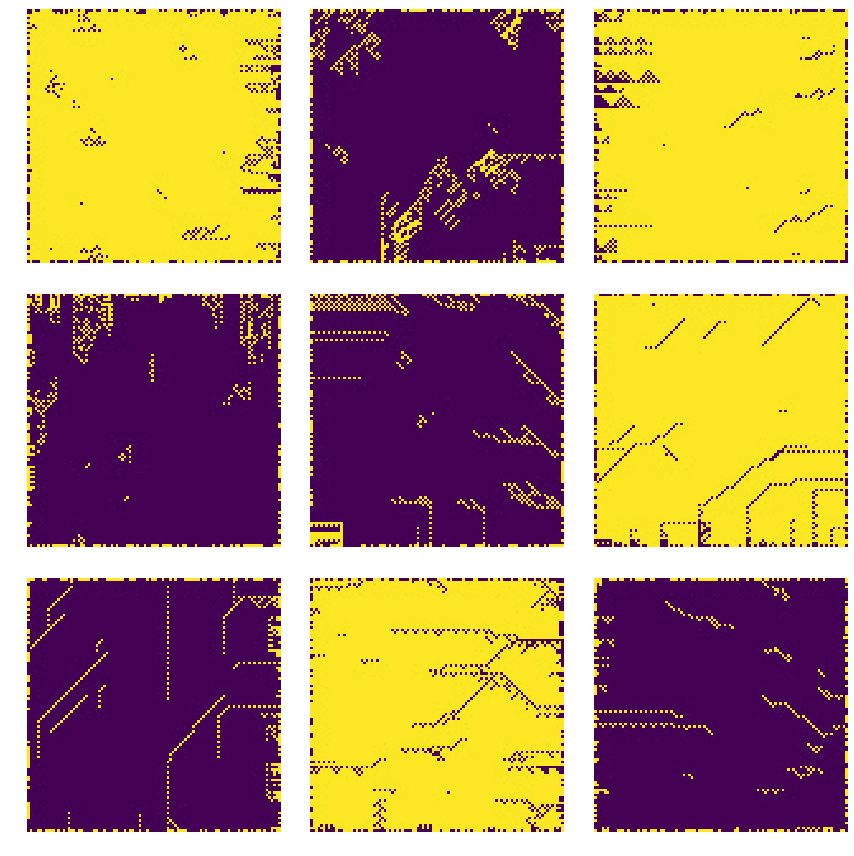

In [160]:
showImages(0,9)

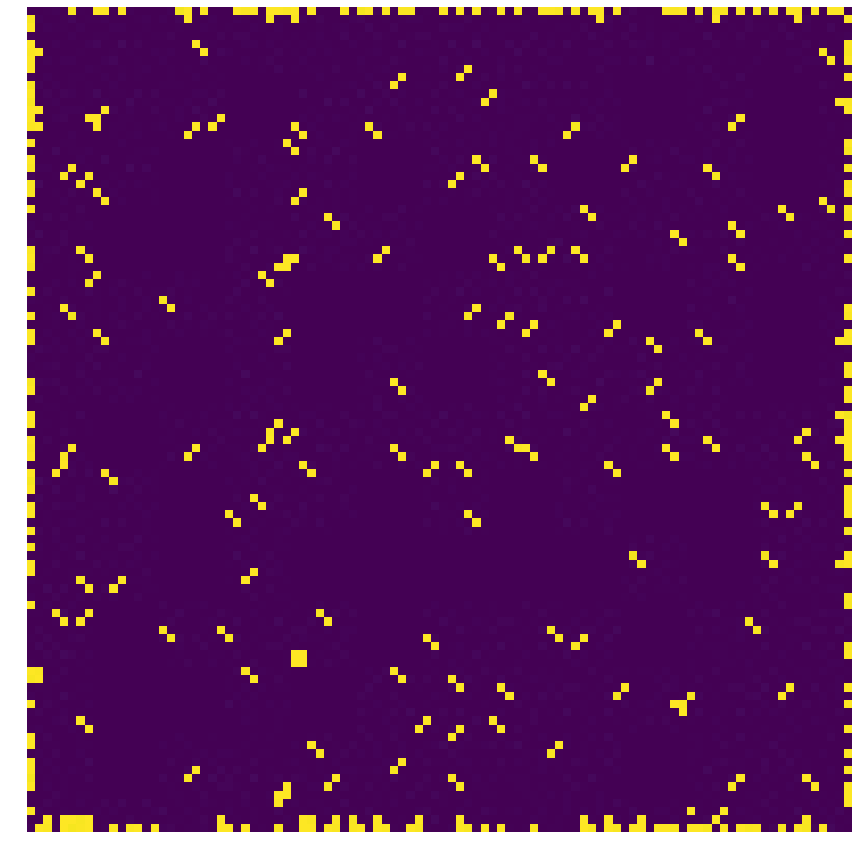

In [165]:
showImages(4,2)

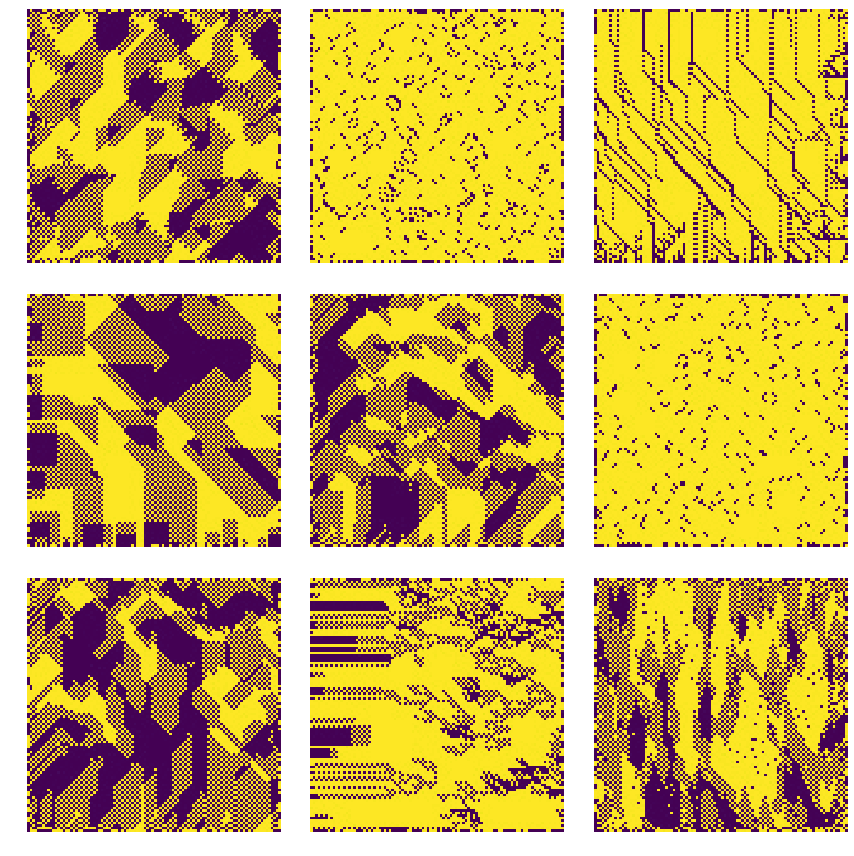

In [168]:
showImages(1,9)

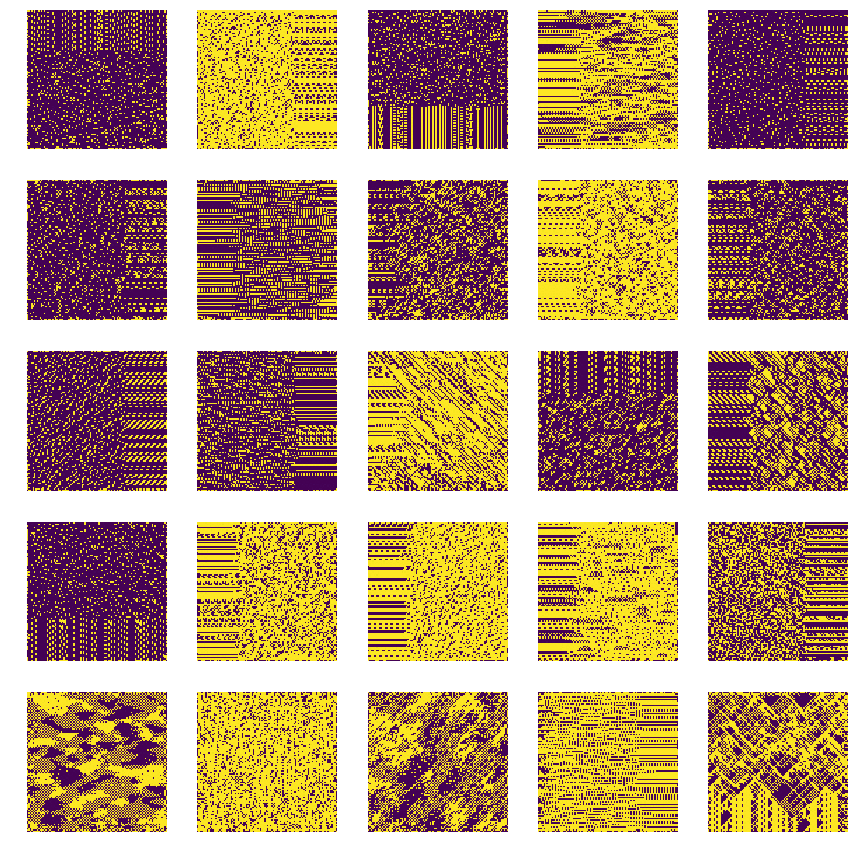

In [169]:
showImages(5,25)

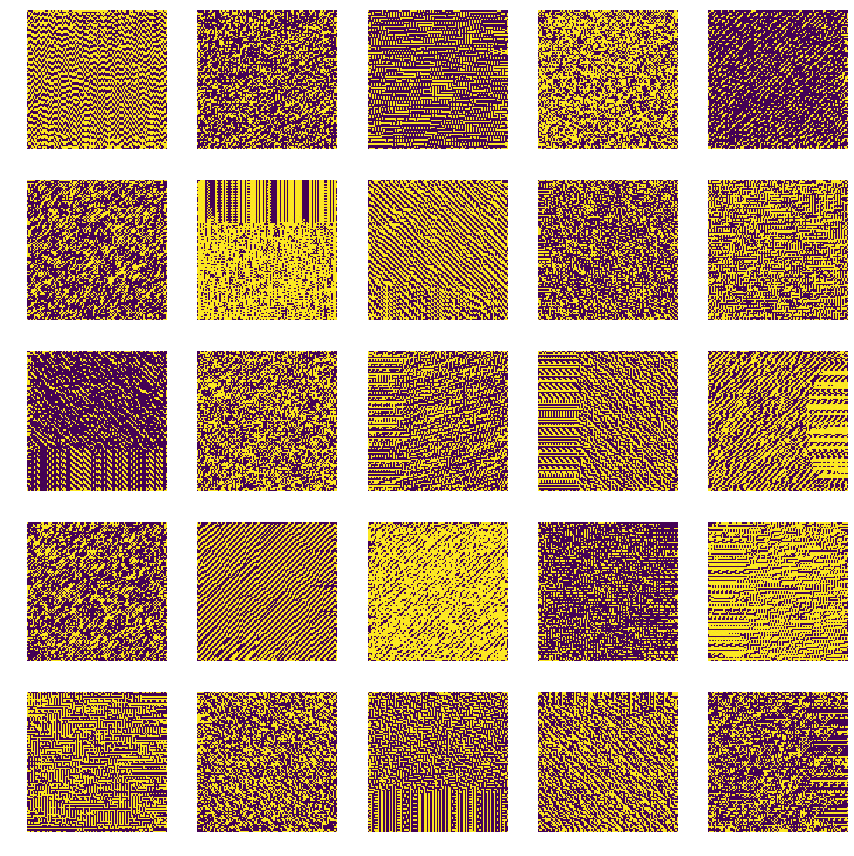

In [170]:
showImages(6,25)